Dataset Description & K-Means Suitability Evaluation
The dataset consists of two numerical features, V1 and V2, with no detected outliers. The data was normalized to ensure even scaling across features.

Using the Elbow Method, the optimal number of clusters was determined to be K = 4, indicating that the data naturally groups into four distinct clusters. The absence of outliers ensures that K-Means can effectively partition the dataset without distortion from extreme values.

Since K-Means performs best on compact, well-separated clusters, the dataset's suitability was visually confirmed through scatter plots and box plots. Given these conditions, the dataset is well-suited for K-Means clustering, making it a viable choice for further analysis.

In [1]:
#imports
!pip install kneed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from kneed import KneeLocator  # Detects the "elbow"


In [24]:
#loading data to my dataframe
dataset1 = pd.read_csv('https://d3c33hcgiwev3.cloudfront.net/em-9EhjTEemU7w7-EFnPcg_7aa34fc018d311e980c2cb6467517117_happyscore_income.csv?Expires=1741305600&Signature=eV6Tv~2dzTvwWFravkxh7m38k0nYMErIBCRf0bjvn2J2CbvqGfKYuhmnXvun7aBuUTM-EMNZYRNCmA0Sbl05FdOiEn0cPPCqdEixjlRFypYmcNKmAWJwqYw3ks-MB-Sh1T2xshsmQ-pRP6fu8434dZdyjIz9EetwrEHjfxPS61U_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A')
dataset1 = dataset1[['happyScore', 'avg_income']].rename(columns={'happyScore': 'V1', 'avg_income': 'V2'})


In [25]:
dataset1


,V1,V2
0,4.350,2096.76
1,4.033,1448.88
2,6.574,7101.12
3,7.200,19457.04
4,7.284,19917.00
...,...,...
106,6.485,7544.40
107,5.360,2231.40
108,4.642,3889.32
109,5.129,956.76


In [26]:
print(len(dataset1))

111


In [27]:
dataset_cleaned = dataset1.dropna()
dataset_zscore = dataset_cleaned[(np.abs(stats.zscore(dataset_cleaned)) < 3).all(axis=1)]

print(len(dataset_cleaned))

111


In [29]:
#statistical calculations
meanV1, stdV1, varV1 = dataset_cleaned['V1'].mean(), dataset_cleaned['V1'].std(), dataset_cleaned['V1'].var()
meanV2, stdV2, varV2 = dataset_cleaned['V2'].mean(), dataset_cleaned['V2'].std(), dataset_cleaned['V2'].var()


In [30]:
print(f"meanV1 {meanV1}, stdV1 = {stdV1}, varV1 = {varV1}")
print(f"meanV2 = {meanV2}, stdV2 = {stdV2}, varV2 = {varV2}")

meanV1 5.421909909909912, stdV1 = 1.1808005493158176, varV1 = 1.3942899372645368
meanV2 = 6442.75141621464, stdV2 = 6479.533691637292, varV2 = 41984356.86106279


In [31]:
#standerdization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_cleaned[['V1', 'V2']] = scaler.fit_transform(dataset_cleaned[['V1', 'V2']])

In [32]:
dataset_cleaned.head()

,V1,V2
0,-0.911899,-0.673768
1,-1.181579,-0.774210
2,0.980110,0.102068
3,1.512664,2.017631
4,1.584124,2.088940


Visualizations

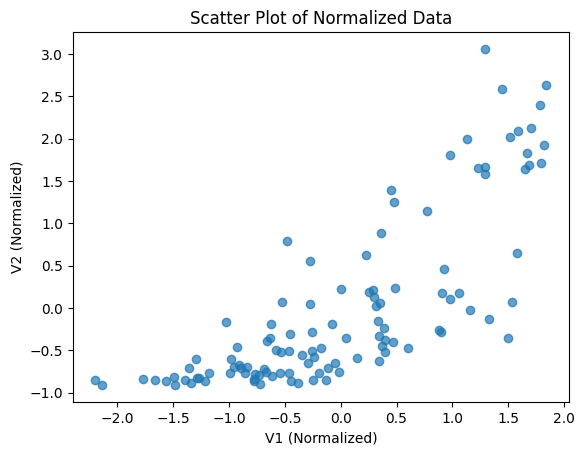

In [49]:
#scatter plot
plt.scatter(dataset_cleaned['V1'], dataset_cleaned['V2'], alpha=0.7)
plt.xlabel('V1 (Normalized)')
plt.ylabel('V2 (Normalized)')
plt.title('Scatter Plot of Normalized Data')
plt.show()

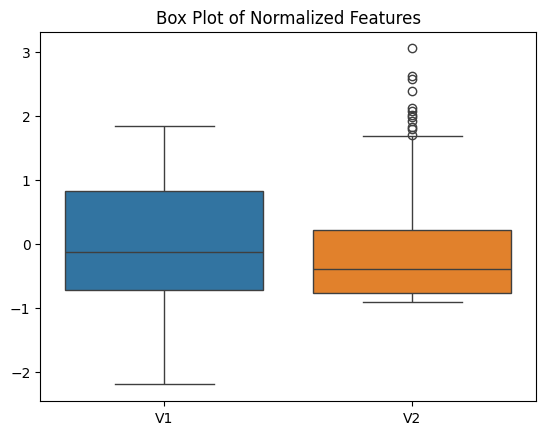

In [34]:
#boxplot To Check Normalization Effects
sns.boxplot(data=dataset_cleaned)
plt.title('Box Plot of Normalized Features')
plt.show()

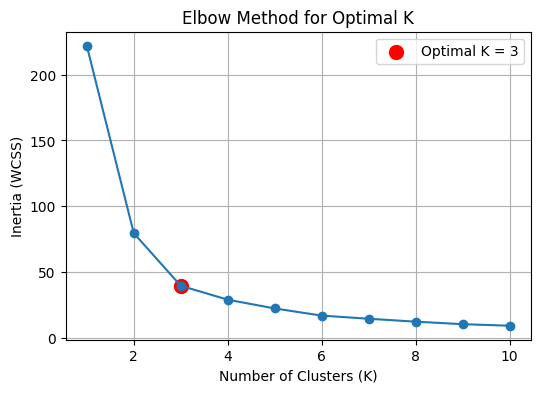

The optimal number of clusters is: 3


In [35]:
#using knee locator


inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicit n_init
    kmeans.fit(dataset_cleaned)
    inertia.append(kmeans.inertia_)

# Find the optimal K using the "elbow" detection method
knee_locator = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)

# Annotate the optimal K beside the curve
if optimal_k:
    plt.scatter(optimal_k, inertia[optimal_k - 1], color='red', s=100, label=f'Optimal K = {optimal_k}')
    plt.legend()

plt.show()

print(f"The optimal number of clusters is: {optimal_k}")


## Clustering
Step 1: run K-means on the given dataset

Step 2: visualise the results.

Step 3: re-run K-means several times and visualise the results.

Step 4: compare the results: is the K-means algorithm stable?

Step 5:  describe your results.

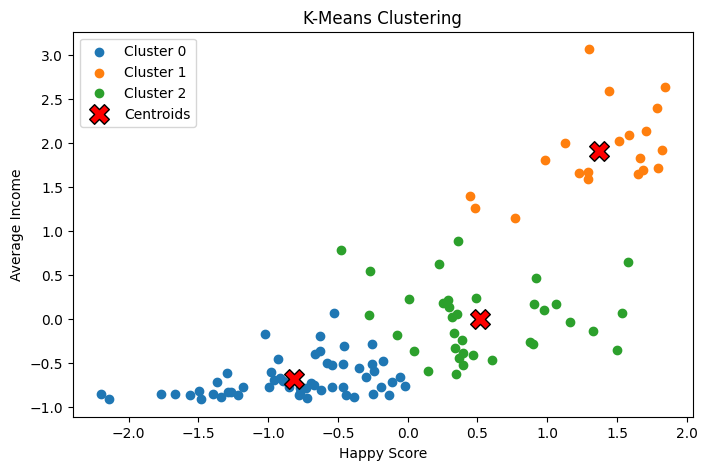

In [40]:
# Run K-Means with chosen k
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(dataset_cleaned)  # Use dataset_cleaned for clustering

# Plot Clusters with different colors
plt.figure(figsize=(8, 5))
for i in range(k):
    # Get the data points for the current cluster using boolean indexing
    cluster_data = dataset_cleaned[clusters == i]
    # Access the 'V1' and 'V2' columns for plotting
    plt.scatter(cluster_data['V1'], cluster_data['V2'], label=f'Cluster {i}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, edgecolors='k', label='Centroids')

plt.xlabel('Happy Score')
plt.ylabel('Average Income')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Rerunning several times

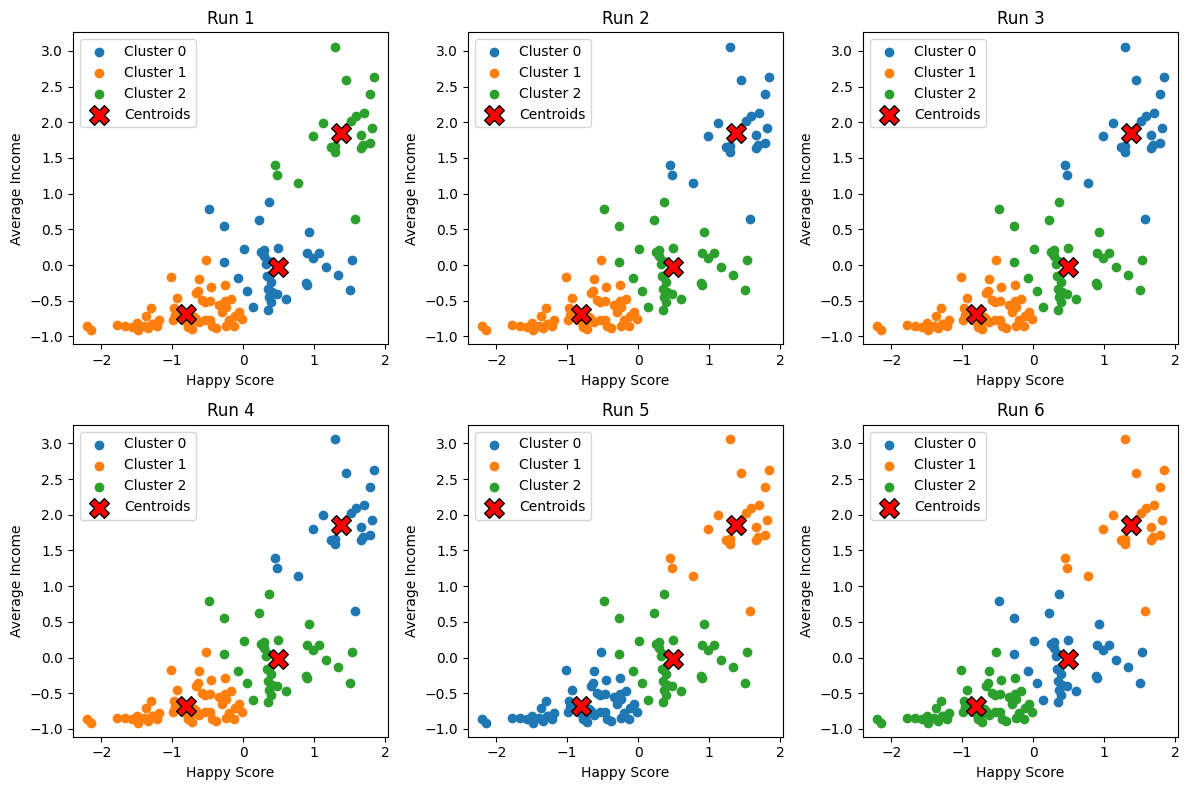

In [43]:

# Set the number of clusters and random runs
k = 3
n_runs = 6  # Number of times to run K-Means

plt.figure(figsize=(12, 8))

# Loop through multiple runs of K-Means
for run in range(n_runs):
    kmeans = KMeans(n_clusters=k, random_state=run, n_init=10)
    clusters = kmeans.fit_predict(dataset_cleaned[['V1', 'V2']])  # Use V1 and V2 for clustering

    plt.subplot(2, n_runs // 2, run + 1)  # Arrange subplots
    for i in range(k):
        cluster_data = dataset_cleaned[clusters == i]
        plt.scatter(cluster_data['V1'], cluster_data['V2'], label=f'Cluster {i}')

    # Plot centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolors='k', label='Centroids')

    plt.title(f'Run {run + 1}')
    plt.xlabel('Happy Score')
    plt.ylabel('Average Income')
    plt.legend()

plt.tight_layout()
plt.show()

# **What to Conclude from Stable Results:**
K-Means is Stable: The algorithm is likely providing a solid representation of the data, and the number of clusters you've chosen (k=3) is appropriate for your dataset.
Reliable Clusters: You can confidently use the resulting clusters for further analysis, as they are reproducible and not influenced by random initialization.
Trustworthy Results: The consistency across runs means you can trust the clustering to be a true reflection of the natural groupings in your data.